# Środowisko pracy

Na zajęciach będziemy korzystać z języka Python w wersji 3.7 (lub nowszej) oraz zestawu konkretnych pakietów. Na własną odpowiedzialność można korzystać z innych wersji Pythona. Poprzednie wersje Pythona (w szczególności 2.x) nie są zalecane i mogą nie być kompatybilne z notebookami!

## Lokalnie

1. Ściągnąć repozytorium przedmiotu: `git clone https://github.com/gmum/ml2022-23`  
(Można również ściągnąć zipa repozytorium "ręcznie")


2. Ściągnąć minicondę: https://conda.io/en/latest/miniconda.html (Niewymagane jeśli zainstalowana jest `Anaconda`)  
Na windowsie: uruchomić `Anaconda Prompt`


3. Stworzyć środowisko razem z wymaganymi paczkami:  
```
conda create --name ml python=3.7 numpy=1.19.1 scipy=1.5.2 matplotlib=3.1.1 scikit-learn=0.23.2 jupyter notebook
```


4. Aktywować środowisko:
Unix/MacOS: `conda activate ml`  
Windows: w `Anaconda Prompt`: `activate ml`


5. OPCJONALNIE: Doinstalować PyTorcha: https://pytorch.org/  
 * GPU: `conda install pytorch torchvision cudatoolkit=10.2 -c pytorch`
 * CPU only: `conda install pytorch torchvision cpuonly  -c pytorch`


6. W folderze repo odpalić serwer jupytera: `jupyter notebook`


7. Sprawdzić w przeglądarce czy wszystko działa

### Test środowiska

In [2]:
import matplotlib
import numpy as np
import scipy
import sklearn
#import torch  # uncomment if necessary

## Colaboratory (opcjonalnie)
W przyszłości do notebooków mogą być potrzebne większe zasoby obliczeniowe. W tym celu będziemy korzystać z narzędzia [Google Colaboratory](https://colab.research.google.com/), które udostępnia za darmo dostęp do GPU. Opcjonalnie można teraz przetestować jego działanie:

1. Wrzucić folder z repo na swojego Google Drive.

2. Otworzyć ten plik i z dostępnych aplikacji wybrać `Colaboratory`

3. Sprawdzić powyższą komórką czy wszystko działa.

# Wstęp do pakietów naukowych: NumPy

Na początek polecam zaznajomić się z podstawami NumPy, polecany tutorial na kompletny wstęp: https://numpy.org/devdocs/user/absolute_beginners.html
Dodatkowo z kolejnej części https://numpy.org/devdocs/user/basics.html warto zaznajomić się z: Data types, Array creation, Indexing, Broadcasting.

Rada ogólna: nie bać się "googlowania" i czytania dokumentacji.

**Kolejne zajęcia będą zakładać znajomość podstaw korzystania z numpy. Dla osób, które nie potrafią samodzielnie wykonać poniższych ćwiczeń, przetworzenie materiału z powyższych poradników jest obowiązkowe.**

### Zadanie 1.
Używając funkcji [`np.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) wylosować dwie macierze **różnych** rozmiarów, i następnie przenożyć je przez siebie macierzowo tak aby otrzymać macierz rozmiaru `9x6`.

In [5]:
A = np.random.normal(size=(9,4))
B = np.random.normal(size=(4,6))

C = np.dot(A,B)

print([m.shape for m in [A, B, C]])

assert A.shape != B.shape
assert C.shape == (9,6)



[(9, 4), (4, 6), (9, 6)]


### Zadanie 2.

Zaimplementować funkcję $\sigma$, która przyjmuje macierz numpy $X$ (**uwaga**: nie mylić z `np.matrix`!) i zwraca macierz tego samego rozmiaru z wartościami funkcji:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
odpowiednio dla każdego $x$.

Hint: [`np.e`](https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.e)

In [14]:
def fun(x):
    return 1/(1 + np.e**(-x))

def sigmoid(x: np.ndarray) -> np.ndarray:
    return np.vectorize(fun)(x)
        
  
X = np.random.uniform(low=-10, high=10, size=(1000, 2000))

print("OG ARRAY")
print(X)
print("AFTER")
print(sigmoid(X))


assert sigmoid(X).max() <= 1.
assert sigmoid(X).min() >= 0.

OG ARRAY
[[ 0.50872182  8.81150203  1.05843268 ... -2.29558254  9.21542151
  -9.18342626]
 [-2.39578543 -2.74849619 -5.22230152 ...  2.185448   -0.90470601
   4.06112878]
 [-2.60324127  5.17324713  5.45940816 ...  2.47251235 -2.78680378
   1.24943156]
 ...
 [-7.18126242  1.63625369  0.6512467  ... -4.29471283  5.45771689
   6.50446077]
 [-9.2693206  -7.66407373 -2.4848162  ... -7.94181396 -3.9618565
  -5.99177211]
 [-0.17371905  4.49120515  7.53597896 ... -2.67128423 -2.46322308
   9.57487495]]
AFTER
[[6.24506792e-01 9.99851013e-01 7.42390915e-01 ... 9.14894749e-02
  9.99900517e-01 1.02717405e-04]
 [8.34946437e-02 6.01716360e-02 5.36594963e-03 ... 8.98935104e-01
  2.88084372e-01 9.83062270e-01]
 [6.89301088e-02 9.94365784e-01 9.95761963e-01 ... 9.22192226e-01
  5.80414543e-02 7.77201446e-01]
 ...
 [7.60128671e-04 8.37024532e-01 6.57291349e-01 ... 1.34569292e-02
  9.95754820e-01 9.98505489e-01]
 [9.42636548e-05 4.69171110e-04 7.69294995e-02 ... 3.55434542e-04
  1.86724613e-02 2.49300062

In [21]:
%%timeit n=10
sigmoid(X)

501 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Zadanie 3.
Ustandaryzować wartości w macierzy $X$ per kolumna, tzn. dla każdej wartości $x$ w kolumnie wykonać:

$$ f(x_{ij}) = \frac{x_{ij} - \mu_j}{\sigma_j} $$

gdzie $\mu_j$ to średnia wartość kolumny $j$, a $\sigma_j$ to odchylenie standardowe kolumny $j$.

In [13]:
X = np.random.uniform(low=-10, high=10, size=(100, 10))

X_hat = (X - np.mean(X, axis=0))/np.std(X, axis=0)

assert np.allclose(X_hat.mean(0), 0.)
assert np.allclose(X_hat.std(0), 1.)

### Zadanie 4.

Dla funkcji $\sigma$ z Zadania 2, narysować jej wykres dla argumentów z zakresu $(-10, 10)$. Użyjemy do tego funkcji `plot` z biblioteki [matplotlib](https://matplotlib.org/).

Narysowany wykres powinien przypominać poniższy:

![sigmoid](https://raw.githubusercontent.com/gmum/ml2022-23/main/lab/resources/sigmoid.png)

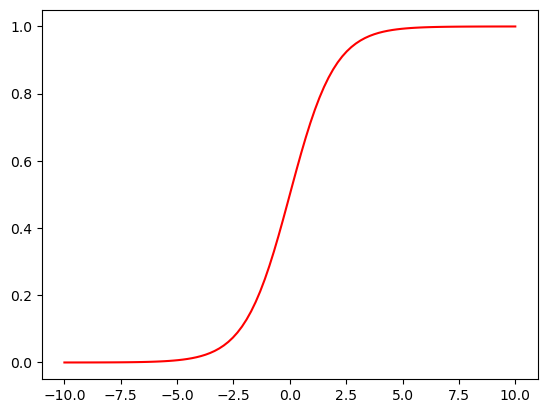

In [19]:
import matplotlib.pyplot as plt

X = np.linspace(-10,10,100)

Y = fun(X)

plt.plot(X,Y, 'r')
plt.show()
